# PROYECTO 1

## Descripción de datos
— `Name (Nombre)`

— `Platform (Plataforma)`

— `Year_of_Release (Año de lanzamiento)`

— `Genre (Género) `

— `NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)` 

— `EU_sales (ventas en Europa en millones de dólares estadounidenses)` 

— `JP_sales (ventas en Japón en millones de dólares estadounidenses)` 

— `Other_sales (ventas en otros países en millones de dólares estadounidenses)`

— `Critic_Score (máximo de 100)` 

— `User_Score (máximo de 10)` 

— `Rating (ESRB)`



In [3]:
# Importación de librería
import pandas as pd
games_df = pd.read_csv('games.csv')

## Preparación de datos

In [4]:
#Indormación general de datos
games_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
print(games_df.sample(10))

                                       Name Platform  Year_of_Release  \
11342           Gundam Seed: Battle Assault      GBA           2004.0   
8762                   NBA Street Homecourt      PS3           2007.0   
2116                          Madden NFL 08      PS3           2007.0   
10788                              MotoGP 2       XB           2003.0   
4851              Naruto: Path of the Ninja       DS           2007.0   
5515    Capcom Classics Collection Reloaded      PSP           2006.0   
648                Dragon Ball Z: Budokai 2      PS2           2003.0   
8768                          Get On Da Mic      PS2           2004.0   
7891   Where's Waldo? The Fantastic Journey      Wii           2009.0   
14465        Super Meat Boy: Ultra Edition!       PC           2011.0   

              Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
11342      Fighting      0.06      0.02      0.00         0.00           NaN   
8762         Sports      0.12      0

In [6]:
#Cambio de los nombres de las columnas a minúsculas
games_df.columns = [column.lower() for column in games_df.columns]
print(games_df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [7]:
#Valores ausentes
print(games_df.isna().mean())


name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64


* Year of release, tengo faltante ~1.6% del total, no es una cantidad significativa, puedo rellenar con el año más frecuente, es un valor discreto por lo que tiene más sentido usar esto que un promedio.Podría tenerse la ausencia si son juegos más antiguos o menos populares y falte el registro. Por lo mismo que es discreto es mejor manejarlo como entero.

* Critic score, tengo faltante un ~51.3%. Es un número significativo que puede deberse a que no hay registro de críticas si no son juegos muy populares. Por alto porcentaje prefiero sólo reemplazar nan por N/I como NO INFORMATION para mantener la integridad de los análisis. Aunque de realizar analisis luego se tendrán que filtrar para poder realizar cálculos.

* User score, tengo faltante un ~40%. Tiene tbd quizá porque se aplicó a juegos muy nuevos.La usencia igual podría ser por la falta de interacción con los juegos. Lo mejor es convertir esos valores tbd a nan, finalmente es un valor que no tengo y así podría tratarlo parejo. Por alto porcentaje prefiero sólo reemplazar nan por N/I como NO INFORMATION para mantener la integridad de los análisis, igual que arriba.

* Rating,tengo faltante un ~40%. Pueden existir juegos sin clasificación ya sea porque son viejos o porque no son desarrollados por las principales compañias. Lo mejor es rellenar con "N/A" para mantener las filas.


In [8]:
# Contar duplicados explícitos
print(games_df.duplicated().sum())

0


In [9]:
#Relleno de valores faltantes
games_df['year_of_release'] = games_df['year_of_release'].fillna(games_df['year_of_release'].mode()[0])

#Conversión a entero
games_df['year_of_release'] = games_df['year_of_release'].astype('Int64')

In [10]:
#Conversión de tbd a Nan
import numpy as np
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan)
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')

In [11]:
# Rellenar los valores faltantes con "N/A" (Not applicable) o "N/I" (No information) 
games_df['rating'] = games_df['rating'].fillna('N/A')
games_df['name'] = games_df['name'].fillna('N/I')
games_df['genre'] = games_df['genre'].fillna('N/I')
games_df['critic_score'] = games_df['critic_score'].fillna('N/I')
games_df['user_score'] = games_df['user_score'].fillna('N/I')


In [12]:
#Comprobación de valores ausentes
print(games_df.isna().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


## Análisis de datos

In [13]:
#Calculo de ventas totales por juego
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
print(games_df[['name', 'total_sales']].head())

                       name  total_sales
0                Wii Sports        82.54
1         Super Mario Bros.        40.24
2            Mario Kart Wii        35.52
3         Wii Sports Resort        32.77
4  Pokemon Red/Pokemon Blue        31.38


In [14]:
#Calculo de juegos lanzados por años
games_by_year = games_df['year_of_release'].value_counts().sort_index()
print(games_by_year)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1696
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: Int64


In [15]:
#Ventas de todas las regiones para cada plataforma
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
platform_sales = games_df.groupby('platform')['total_sales'].sum()
platform_sales_sorted = platform_sales.sort_values(ascending=False).head(10)
print(platform_sales_sorted)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


In [16]:
platform_year_sales = games_df.groupby(['platform', 'year_of_release'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
platform_year_sales['total_sales'] = platform_year_sales.sum(axis=1)
platform_sales_total = platform_year_sales.groupby('platform')['total_sales'].sum()
platform_sales_sorted = platform_sales_total.sort_values(ascending=False)
top_10_platforms = platform_sales_sorted.head(10)
platform_yearly_sales = platform_year_sales[platform_year_sales.index.get_level_values('platform').isin(top_10_platforms.index)]
print(platform_yearly_sales)

                          na_sales  eu_sales  jp_sales  other_sales  \
platform year_of_release                                              
DS       1985                 0.00      0.00      0.02         0.00   
         2004                 8.33      3.93      3.65         1.36   
         2005                47.99     41.49     29.86        10.80   
         2006                50.01     23.07     38.56         8.17   
         2007                75.25     33.79     26.81        11.09   
...                            ...       ...       ...          ...   
X360     2012                58.39     32.00      1.06         8.29   
         2013                53.36     27.03      0.43         7.76   
         2014                20.25     11.28      0.08         3.13   
         2015                 7.36      3.50      0.00         1.10   
         2016                 0.69      0.71      0.00         0.12   

                          total_sales  
platform year_of_release            

Text(0, 0.5, 'Total Sales (millions of US dollars)')

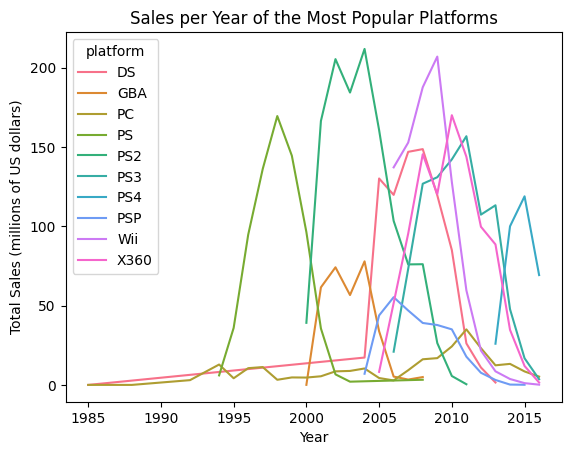

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-bright')
sns.lineplot(x="year_of_release", y="total_sales", hue="platform", data=platform_yearly_sales);
plt.title('Sales per Year of the Most Popular Platforms')
plt.xlabel('Year')
plt.ylabel('Total Sales (millions of US dollars)')

In [22]:
#Años en los que tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer
platform_life = games_df.groupby('platform')['year_of_release'].agg(['min', 'max'])

platform_life['years_of_life'] = platform_life['max'] - platform_life['min']
platform_life_sorted = platform_life.sort_values(by='min')
print(platform_life_sorted)

           min   max  years_of_life
platform                           
2600      1980  2008             28
NES       1983  1994             11
PC        1985  2016             31
DS        1985  2013             28
GB        1988  2008             20
GEN       1990  1994              4
SNES      1990  1999              9
GG        1992  1992              0
SCD       1993  1994              1
NG        1993  1996              3
3DO       1994  1995              1
PS        1994  2008             14
SAT       1994  1999              5
TG16      1995  1995              0
N64       1996  2008             12
PCFX      1996  1996              0
DC        1998  2008             10
WS        1999  2001              2
GBA       2000  2008              8
XB        2000  2008              8
PS2       2000  2011             11
GC        2001  2008              7
PSP       2004  2015             11
X360      2005  2016             11
PS3       2006  2016             10
Wii       2006  2016        

La primeras 5 plataformas duraron más de 10 años de uso en el mercado, donde la PC es aún utilizada, llevando 31 años en el mercado. Donde los 5 más nuevas plataformas introducidas al mercado llevan menos de 10 años siendo utilizadas, siendo las más nuevas el PS4 y Xone con 3 años.
Hay plataformas que muestran un 0 que se podría suponer debido a que su uso fue de meses, dentro del mismo año como es para GG, TG16 y PCFX, seguramente fueron un fracaso en el mercado y fueron descontinuadas.

En la gráfica se observa:

* El DS, tuvo un pico de ventas notable alrededor de 2007-2008 pero sus ventas cayeron rápidamente para el ~2009.

* El GBA, entro al mercado por el 2000, tuvo ventas arriba de 50 millones de dolares pero sus ventas cayeron y su ciclo de vida termino en el 2008.

* La PC, ha tenido un ciclo de vida prolongado, con ventas bajas a comparación de otras consolas, con un aumento después del 2006.

* El PS, tuvo un rápido incremento de ventas luego de su introducción al mercado pero después de ~1997, sus ventas empezaron a caer, manteniéndose con un bajo nivel hasta el 2008.

* El PS2, el más exitoso en ventas, ha tenido picos de ventas arriba de 200 millones de dolares, con un ciclo de vida de 11 años, terminando en el 2011.

* El PS3, ha estado en el mercado desde el 2006, tuvo buenas ventas en el ~2012, muy parecidas al X360, igual sus ventas han caído y podría enfrentar la obsolescencia.

* El PS4, ha estado en el mercado desde el 2013, tuvieron un pico de ventas en el ~2015 pero parece que las ventas están cayendo.

* El PSP, su ciclo de vida comienza en el 2004 y termina en el 2015, no tuvo ventas tan significativas como las otras consolas.

* El Wii,ha estado en el mercado desde el 2006, sus ventas rápidamente aumentaron a los ~200 millones de dólares, pero después de eso han caído rápidamente.

* El X360, ha estado en el mercado desde el 2005, tuvo un pico de ventas arriba de 150 millones de dólares por el ~2011, después de eso sus ventas han caído, podría enfrentar la obsolescencia.

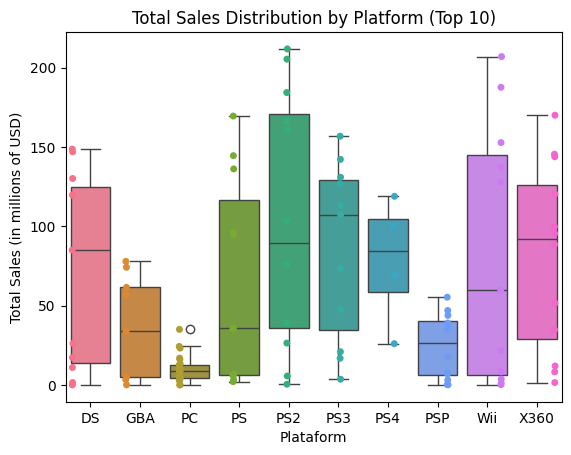

In [25]:
#Creación de de diagrama de ventas globales por plataforma
platform_yearly_sales_reset = platform_yearly_sales.reset_index()
sns.boxplot(x="platform", y="total_sales", hue="platform", data=platform_yearly_sales_reset)
sns.stripplot(x="platform", y="total_sales", hue="platform", data=platform_yearly_sales_reset, dodge=True)
plt.title('Total Sales Distribution by Platform (Top 10)')
plt.xlabel('Plataform')
plt.ylabel('Total Sales (in millions of USD)')
plt.show()


El máximo del PS2 indica que fue la plataforma con mayores ventas pero la altura de la caja (IQR) también denota que hubo una mayor dispersión en las ventas. A pesar de tener el valor máximo de ventas, podemos observar que la mediana del PS3 fue más alta e inclusive se ve parecida a la de X360.
El Wii de igual manera tuvo una dispersión grande de ventas, donde su valor máximo de  ventas estuvo muy cercano al PS2, pero su misma dispersión hace que su mediana sea más baja.
El DS muestra una mediana de ventas cercana al PS2, PS4, X360. Pero la caja es relativamente corta, lo que sugiere que la mayoría de los juegos tuvieron ventas dentro de un rango más estrecho en comparación con PS2 o Wii.
El PC tiene una mediana de ventas relativamente baja y una dispersión menor en comparación con las consolas.

platform
PS2     104.647500
PS3      85.422727
Wii      82.500909
X360     80.951667
PS4      78.535000
DS       73.283636
PS       66.441818
GBA      35.316667
PSP      24.504167
PC        9.981538
Name: total_sales, dtype: float64


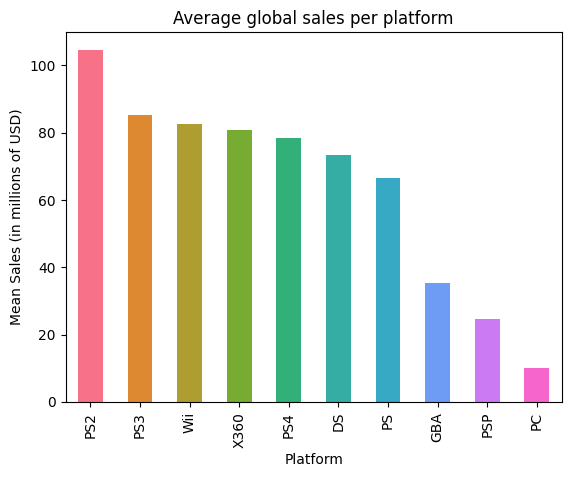

In [31]:
#Ventas globales promedio por plataforma 

platform_mean_total_sales = platform_yearly_sales_reset.groupby('platform')['total_sales'].mean()

platform_mean_total_sales_sorted = platform_mean_total_sales.sort_values(ascending=False)

print(platform_mean_total_sales_sorted)
colors = sns.color_palette('husl', n_colors=len(platform_mean_total_sales_sorted))

platform_mean_total_sales_sorted.plot(x='platform',
        kind='bar',
        color=colors,
        title='Average global sales per platform',
        xlabel='Platform',
        ylabel='Mean Sales (in millions of USD)'
        )
plt.show()        

Por mediana de las ventas totales, podemos observar en la gráfica boxplot que el orden es PS3, X360, PS2, DS, PS4, Wii, PSS, GBA, PSP, PC.

En la gráfica de barras podemos observar que el promedio las lleva a tener las plataformas en el siguiente orden: PS2, PS3, Wii, X360, PS4, DS,PS, GBA, PSP, PC.

Esta variación debido a la dispersión de datos que se menciona anteriormente, que cajas como del PS2, WII, DS y PD tienen. 

Por esta dispersión de datos es más confiable representar los datos con la mediana.

    

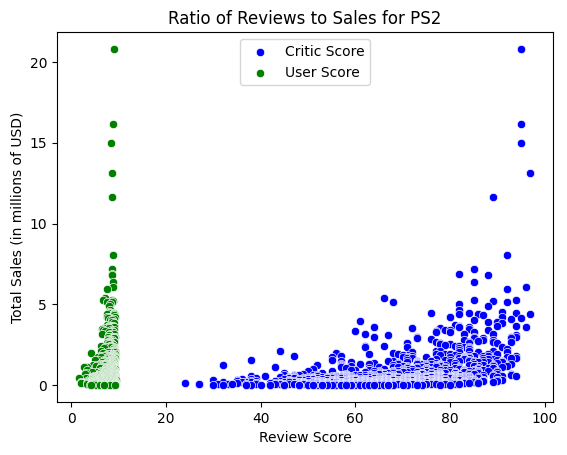

Correlation between Critic Score and Sales: 0.4772342313214961
Correlation between User Score and Sales: 0.2167793008798788


In [33]:
# Afectación de reseñas de usuarios y profesionales a las ventas de una plataforma popular 
selected_platform = 'PS2'

games_df['critic_score'] = pd.to_numeric(games_df['critic_score'], errors='coerce')
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')

platform_data = games_df[games_df['platform'] == selected_platform]

sns.scatterplot(x='critic_score', y='total_sales', data=platform_data, color='blue', label='Critic Score')

sns.scatterplot(x='user_score', y='total_sales', data=platform_data, color='green', label='User Score')

plt.title(f'Ratio of Reviews to Sales for {selected_platform}')
plt.xlabel('Review Score')
plt.ylabel('Total Sales (in millions of USD)')
plt.legend()
plt.show()

critic_corr_spearman = platform_data['critic_score'].corr(platform_data['total_sales'], method='spearman')
user_corr_spearman = platform_data['user_score'].corr(platform_data['total_sales'], method='spearman')

print(f"Correlation between Critic Score and Sales: {critic_corr_spearman}")
print(f"Correlation between User Score and Sales: {user_corr_spearman}")

Critic score y Ventas

La correlación de 0.3954 indica una correlación positiva débil.Hay una tendencia a que los juegos mejor valorados por la crítica vendan más, pero esta relación no es muy fuerte ni directa. Esto se puede observar en el gráfico, hay juegos que obtivieron una puntuación alta y tuvieron altas ventas, al igual que juegos que tuvieron una puntuación baja y ventas baja, sin embargo no está muy remarcado como una relación directa positiva. 

User Score y ventas

La relación es muy débil con un coeficiente de 0.17. Donde se puede interpretar que la puntuación de los usuarios tiene una influencia mucho menor en las ventas totales en comparación con la opinión de los críticos.

platform                         DS   GBA    GC    PC    PS2   PS3  X360    XB
name                                                                          
Final Fantasy X                 NaN   NaN   NaN   NaN   8.04   NaN   NaN   NaN
Gran Turismo 3: A-Spec          NaN   NaN   NaN   NaN  14.97   NaN   NaN   NaN
Gran Turismo 4                  NaN   NaN   NaN   NaN  11.65   NaN   NaN   NaN
Grand Theft Auto III            NaN   NaN   NaN  0.01  13.10   NaN   NaN   NaN
Grand Theft Auto: San Andreas   NaN   NaN   NaN  0.97  20.81   NaN  0.11  1.96
Grand Theft Auto: Vice City     NaN   NaN   NaN  0.04  16.15   NaN   NaN   NaN
Kingdom Hearts                  NaN   NaN   NaN   NaN   6.40  1.74   NaN   NaN
Medal of Honor: Frontline       NaN   NaN  0.60   NaN   6.84   NaN   NaN  1.49
Need for Speed Underground      NaN  0.30  1.21  0.05   7.20   NaN   NaN  1.71
Need for Speed Underground 2   0.14  0.44  1.13  0.07   6.90   NaN   NaN  2.28


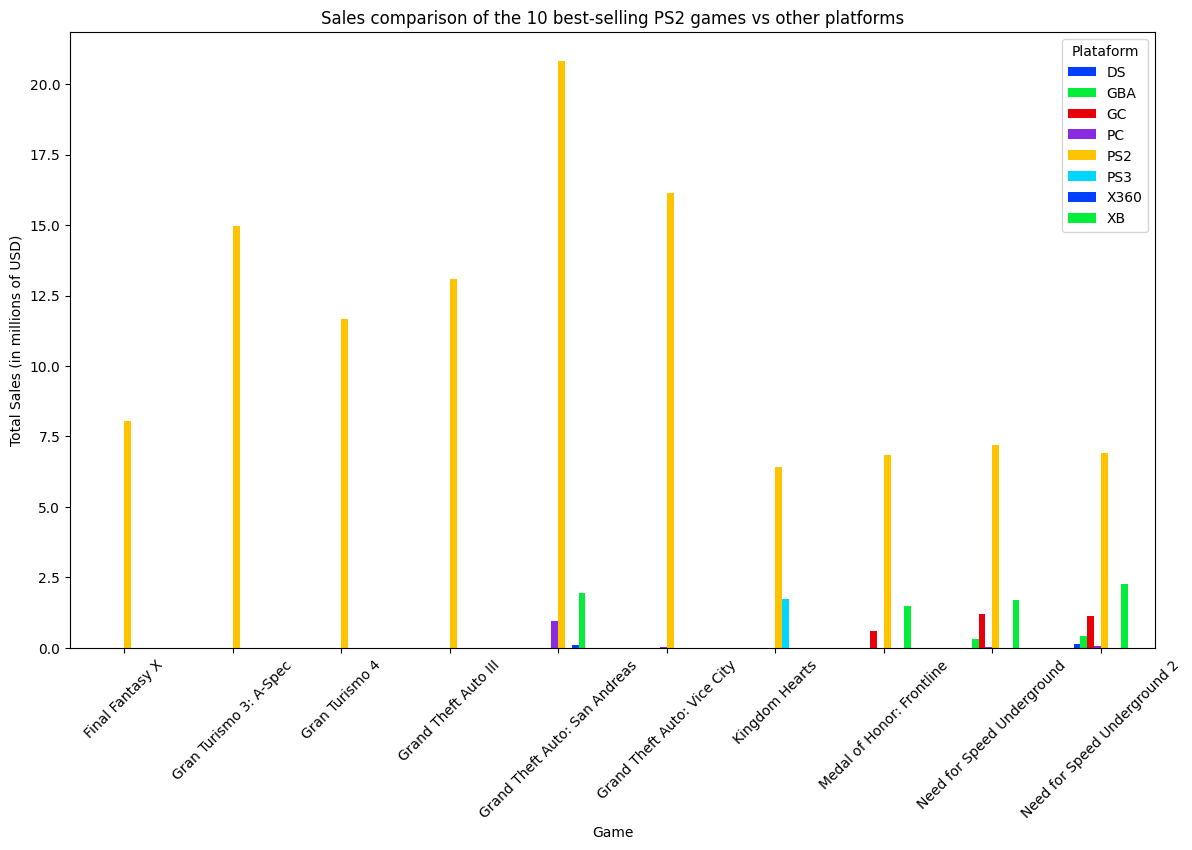

In [34]:
# Obtención de juegos más vendidos en PS2 y comparación de ventas en otras plataformas
ps2_top_selling_games = platform_data.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(10)

platform_comparison = games_df[games_df['name'].isin(ps2_top_selling_games.index)]
platform_comparison = platform_comparison[['platform', 'name', 'total_sales']]

platform_comparison_pivot = platform_comparison.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')

print(platform_comparison_pivot)

platform_comparison_pivot.plot(kind='bar',  figsize=(14, 8))
plt.title('Sales comparison of the 10 best-selling PS2 games vs other platforms')
plt.xlabel('Game')
plt.ylabel('Total Sales (in millions of USD)')
plt.xticks(rotation=45)
plt.legend(title='Plataform')
plt.show()

Como se puede observar, entre los juegos más vendidos del PS2, se puede ver que Final Fantasy X, Gran Turismo 3: A-Spec, Gran Turismo 4, sólo tuvieron ventas registradas para el PS2.
La venta más alta para el PS2 fue la del videojuego Grand Theft Auto: San Andreas, el cual también fue vendido en PC, PS2, X360 y XB.
Mientras que Need for Speed Underground 2  fue vendido en más plataformas siendo vendido en DS, GBA, GC, PC, PS2 y XB.


Ventas por género:
               total_sales
genre                    
Action            1744.17
Sports            1331.27
Shooter           1052.45
Role-Playing       934.56
Platform           827.77
Misc               802.51
Racing             728.67
Fighting           447.53
Simulation         389.97
Puzzle             242.57
Adventure          237.59
Strategy           174.23

Cantidad de juegos por género:
 genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: name, dtype: int64


C:\Users\brend\AppData\Local\Temp\ipykernel_15008\1937683150.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.index, y=genre_sales['total_sales'], palette='viridis')


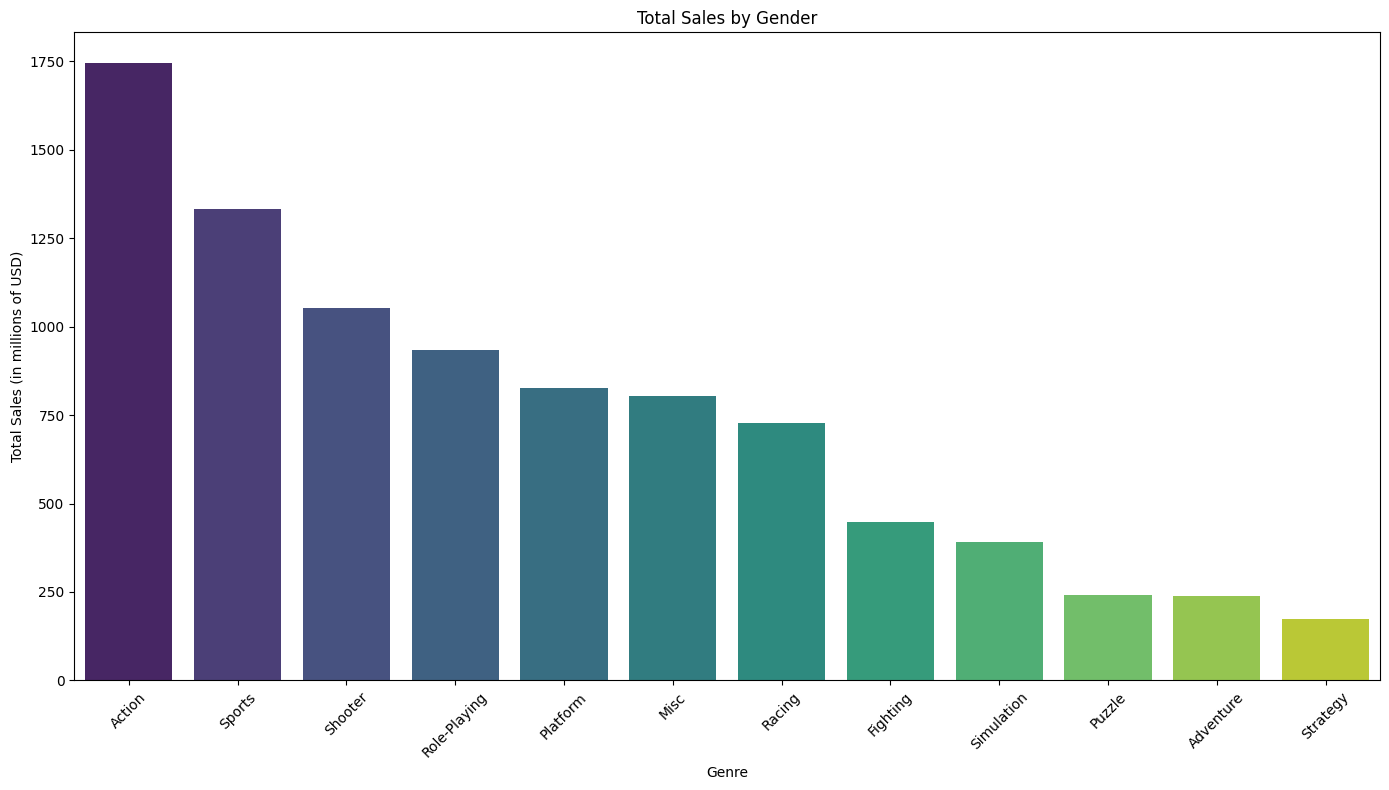

C:\Users\brend\AppData\Local\Temp\ipykernel_15008\1937683150.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


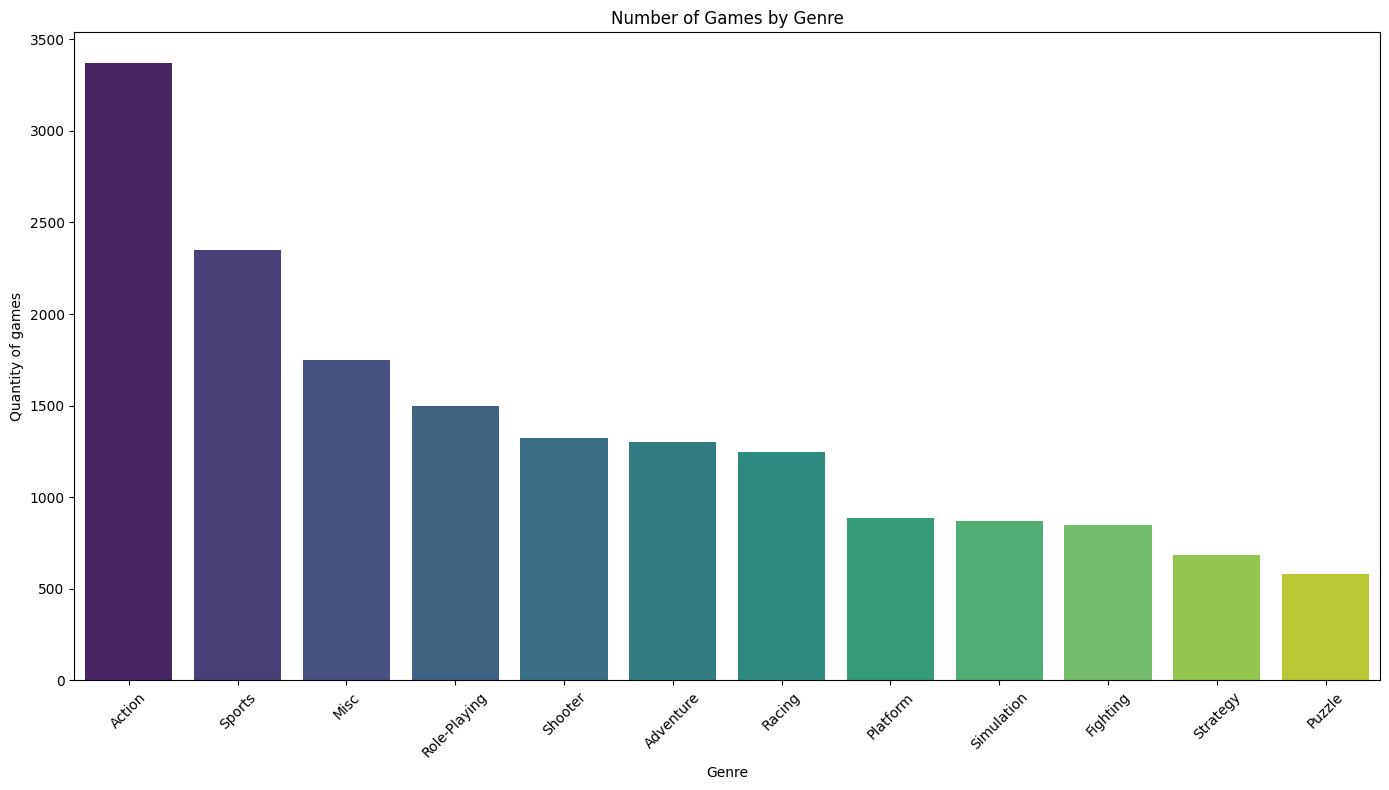

In [35]:
#Distribución general de las ventas totales por género

filtered_genre_df = games_df[games_df['genre'] != 'N/I']
genre_sales = filtered_genre_df.groupby('genre')[['total_sales']].sum().sort_values(by='total_sales', ascending=False)

# Cantidad de juegos por género
genre_counts = filtered_genre_df.groupby('genre')['name'].count()
genre_counts = genre_counts.sort_values(ascending=False)

print("Ventas por género:\n", genre_sales)
print("\nCantidad de juegos por género:\n", genre_counts)

plt.figure(figsize=(14, 8))
sns.barplot(x=genre_sales.index, y=genre_sales['total_sales'], palette='viridis')
plt.title('Total Sales by Gender')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions of USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Number of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Quantity of games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se observa que por género el líder en ventas es action por lo que tiene sentido que haya mayor cantidad de juegos del mismo. Lo mismo pasa con Sports, tiene alto número de ventas y existe una alta cantidad de juegos.
Estrategia y puzzle tienen menos lanzamientos y generan menos ventas totales.
La popularidad y el potencial de ingresos de un género pueden influir en la cantidad de juegos que se desarrollan y lanzan para ese género. Los desarrolladores tienden a invertir más en géneros que han demostrado ser comercialmente exitosos.

## Creación de un perfil de usuario para cada región

In [36]:
# Las cinco plataformas principales por región (NA, UE, JP) 
top_platforms_na = games_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

top_platforms_eu = games_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

top_platforms_jp = games_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Mostrar resultados
print("Top 5 plataformas en NA (Ventas en Norteamérica):\n", top_platforms_na)
print("\nTop 5 plataformas en EU (Ventas en Europa):\n", top_platforms_eu)
print("\nTop 5 plataformas en JP (Ventas en Japón):\n", top_platforms_jp)


Top 5 plataformas en NA (Ventas en Norteamérica):
 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 plataformas en EU (Ventas en Europa):
 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 plataformas en JP (Ventas en Japón):
 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


Para cada región la plataforma con más ventas registradas varia, aunque se puede observar que en NA y EU, el PS2 es de los 2 primeros que lidera las ventas.
Entre NA y EU vemos que 4 de las plataformas más vendidas coniciden, aunque no en el mismo orden de venta. A diferencia con JP dónde vemos plataformas como el SNES y 3DS las cuales no vemos en las otras dos regiones.

In [37]:
#Los 5 géneros principales por región (NA, UE, JP) 
top_genres_na = games_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

top_genres_eu = games_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

top_genres_jp = games_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top 5 géneros en NA (Ventas en Norteamérica):\n", top_genres_na)
print("\nTop 5 géneros en EU (Ventas en Europa):\n", top_genres_eu)
print("\nTop 5 géneros en JP (Ventas en Japón):\n", top_genres_jp)

Top 5 géneros en NA (Ventas en Norteamérica):
 genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Top 5 géneros en EU (Ventas en Europa):
 genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Top 5 géneros en JP (Ventas en Japón):
 genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


A excepción de JP dónde tiene el segundo lugar, podemos ver que por genéro, action, lidera en las regiones.
En NA y EU, los 3 primeros lugares y el 5° coinciden, siendo action, sports, shooter y misc.
JP, tiene en primer lugar Role-Playing, que no figura en las otras regiones en el top 5. Pero tiene al igual action, sports aunque en segundo y tercer lugar y misc igual en 5° lugar.


In [24]:
#Afectación de clasificaciones de ESRB a las ventas en regiones (NA, UE, JP) 
filtered_games_df = games_df[games_df['rating'] != 'N/A']

esrb_sales_na = filtered_games_df.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)

esrb_sales_eu = filtered_games_df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)

esrb_sales_jp = filtered_games_df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Ventas por clasificación ESRB en NA (Norteamérica):\n", esrb_sales_na)
print("\nVentas por clasificación ESRB en EU (Europa):\n", esrb_sales_eu)
print("\nVentas por clasificación ESRB en JP (Japón):\n", esrb_sales_jp)

Ventas por clasificación ESRB en NA (Norteamérica):
 rating
E       1292.99
T        759.75
M        748.48
E10+     353.32
K-A        2.56
Name: na_sales, dtype: float64

Ventas por clasificación ESRB en EU (Europa):
 rating
E       710.25
M       483.97
T       427.03
E10+    188.52
AO        0.61
Name: eu_sales, dtype: float64

Ventas por clasificación ESRB en JP (Japón):
 rating
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
Name: jp_sales, dtype: float64


Por Rating podemos ver que el rating E lidera en todas las regiones. 
El mismo orden de rating lo podemos ver para NA y JP. 
EU tiene el rating M, T y E10+ al igual que las otras regiones en su top 5, destacando en su °5 lugar AO que no lo tienen las otras regiones.

##  Hipótesis

In [38]:
#Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
#H₀:AVGXO=AVGPC  
#H₁:AVGXO≠AVGPC  

xbox_one_scores = games_df[games_df['platform'] == 'XOne']['user_score']
pc_scores = games_df[games_df['platform'] == 'PC']['user_score']

mean_user_sc_xbo = xbox_one_scores.mean()
mean_user_sc_pc = pc_scores.mean()

from scipy import stats
alpha = 0.05

# Realizar una prueba t de dos muestras independientes
t_stat, p_value = stats.ttest_ind(xbox_one_scores.dropna(), pc_scores.dropna(), equal_var=False)

print(f'Valor p: {p_value}')

# Comparar el valor p con el umbral
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para decir que las calificaciones promedio son diferentes.")

print(f'Promedio de Xbox One: {mean_user_sc_xbo}')
print(f'Promedio de PC: {mean_user_sc_pc}')

Valor p: 4.935072360183574e-06
Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.
Promedio de Xbox One: 6.521428571428572
Promedio de PC: 7.062467532467533


In [39]:
#Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
#H₀:AVGAction=AVGSports  
#H₁:AVGAction≠AVGSports 

action_scores = games_df[games_df['genre'] == 'Action']['user_score']
sports_scores = games_df[games_df['genre'] == 'Sports']['user_score']

mean_action_scores = action_scores.mean()
mean_sports_scores = sports_scores.mean()

from scipy import stats
alpha = 0.05

# Realizar una prueba t de dos muestras independientes
t_stat, p_value = stats.ttest_ind(action_scores.dropna(), sports_scores.dropna(), equal_var=False)

print(f'Valor p: {p_value}')

# Comparar el valor p con el umbral
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para decir que las calificaciones promedio son diferentes.")

print(f'Promedio de Action: {mean_action_scores}')
print(f'Promedio de Sports: {mean_sports_scores}')

Valor p: 0.11483818791498286
No podemos rechazar la hipótesis nula: No hay evidencia suficiente para decir que las calificaciones promedio son diferentes.
Promedio de Action: 7.054043715846995
Promedio de Sports: 6.96119673617407


En ambas es una hipótesis de 2 colas, usando t-test, porque queremos probar si hay una diferencia significativa en cualquier dirección entre dos grupos. En otras palabras, no estamos interesados en saber si un grupo es específicamente mayor o menor que el otro, sino si hay cualquier tipo de diferencia.
Donde se entiende en ambas lo siguiente:
* Hipótesis Nula (H₀): La diferencia entre las medias de los dos grupos es igual a cero.
H₀:μ1=μ2 

* Hipótesis Alternativa (H₁): La diferencia entre las medias de los dos grupos no es igual a cero.
H₁:μ1≠μ2

## Conclusión general

### Ciclo de vida de las plataformas:
    
La primeras 5 plataformas duraron más de 10 años de uso en el mercado, donde la PC es aún utilizada, llevando 31 años en el mercado. Donde los 5 más nuevas plataformas introducidas al mercado llevan menos de 10 años siendo utilizadas, siendo las más nuevas el PS4 y Xone con 3 años.
Hay plataformas que muestran un 0 que se podría suponer debido a que su uso fue de meses, dentro del mismo año como es para GG, TG16 y PCFX, seguramente fueron un fracaso en el mercado y fueron descontinuadas.

En la gráfica se observa:

* El DS, tuvo un pico de ventas notable alrededor de 2007-2008 pero sus ventas cayeron rápidamente para el ~2009.

* El GBA, entro al mercado por el 2000, tuvo ventas arriba de 50 millones de dolares pero sus ventas cayeron y su ciclo de vida termino en el 2008.

* La PC, ha tenido un ciclo de vida prolongado, con ventas bajas a comparación de otras consolas, con un aumento después del 2006.

* El PS, tuvo un rápido incremento de ventas luego de su introducción al mercado pero después de ~1997, sus ventas empezaron a caer, manteniéndose con un bajo nivel hasta el 2008.

* El PS2, el más exitoso en ventas, ha tenido picos de ventas arriba de 200 millones de dolares, con un ciclo de vida de 11 años, terminando en el 2011.

* El PS3, ha estado en el mercado desde el 2006, tuvo buenas ventas en el ~2012, muy parecidas al X360, igual sus ventas han caído y podría enfrentar la obsolescencia.

* El PS4, ha estado en el mercado desde el 2013, tuvieron un pico de ventas en el ~2015 pero parece que las ventas están cayendo.

* El PSP, su ciclo de vida comienza en el 2004 y termina en el 2015, no tuvo ventas tan significativas como las otras consolas.

* El Wii,ha estado en el mercado desde el 2006, sus ventas rápidamente aumentaron a los ~200 millones de dólares, pero después de eso han caído rápidamente.

* El X360, ha estado en el mercado desde el 2005, tuvo un pico de ventas arriba de 150 millones de dólares por el ~2011, después de eso sus ventas han caído, podría enfrentar la obsolescencia.

### Ventas globales por plataforma

El máximo del PS2 indica que fue la plataforma con mayores ventas pero la altura de la caja (IQR) también denota que hubo una mayor dispersión en las ventas. A pesar de tener el valor máximo de ventas, podemos observar que la mediana del PS3 fue más alta e inclusive se ve parecida a la de X360.
El Wii de igual manera tuvo una dispersión grande de ventas, donde su valor máximo de  ventas estuvo muy cercano al PS2, pero su misma dispersión hace que su mediana sea más baja.
El DS muestra una mediana de ventas cercana al PS2, PS4, X360. Pero la caja es relativamente corta, lo que sugiere que la mayoría de los juegos tuvieron ventas dentro de un rango más estrecho en comparación con PS2 o Wii.
El PC tiene una mediana de ventas relativamente baja y una dispersión menor en comparación con las consolas.

### Critic score y Ventas

Hay una tendencia a que los juegos mejor valorados por la crítica vendan más, pero esta relación no es muy fuerte ni directa. Esto se puede observar en el gráfico, hay juegos que obtivieron una puntuación alta y tuvieron altas ventas, al igual que juegos que tuvieron una puntuación baja y ventas baja, sin embargo no está muy remarcado como una relación directa positiva y se ve en su correlación de 0.3954, siendo una correlación débil.

### User Score y ventas

La relación es muy débil con un coeficiente de 0.17. Donde se puede interpretar que la puntuación de los usuarios tiene una influencia mucho menor en las ventas totales en comparación con la opinión de los críticos.

### Venta por videojuegos en la plataforma con más ventas (PS2)

Los juegos más vendidos del PS2, se puede ver que Final Fantasy X, Gran Turismo 3: A-Spec, Gran Turismo 4, sólo tuvieron ventas registradas para el PS2.
La venta más alta para el PS2 fue la del videojuego Grand Theft Auto: San Andreas, el cual también fue vendido en PC, PS2, X360 y XB.
Mientras que Need for Speed Underground 2  fue vendido en más plataformas siendo vendido en DS, GBA, GC, PC, PS2 y XB.

### Ventas totales por género y cantidad de juegos por género

El líder en ventas es action por lo que tiene sentido que haya mayor cantidad de juegos del mismo. Lo mismo pasa con Sports, tiene alto número de ventas y existe una alta cantidad de juegos.
Estrategia y puzzle tienen menos lanzamientos y generan menos ventas totales.
La popularidad y el potencial de ingresos de un género pueden influir en la cantidad de juegos que se desarrollan y lanzan para ese género. Los desarrolladores tienden a invertir más en géneros que han demostrado ser comercialmente exitosos.

### Análisis por región

Para cada región la plataforma con más ventas registradas varia, aunque se puede observar que en NA y EU, el PS2 es de los 2 primeros que lidera las ventas.
Entre NA y EU vemos que 4 de las plataformas más vendidas coniciden, aunque no en el mismo orden de venta. A diferencia con JP dónde vemos plataformas como el SNES y 3DS las cuales no vemos en las otras dos regiones.

A excepción de JP dónde tiene el segundo lugar, podemos ver que por genéro, action, lidera en las regiones.
En NA y EU, los 3 primeros lugares y el 5° coinciden, siendo action, sports, shooter y misc.
JP, tiene en primer lugar Role-Playing, que no figura en las otras regiones en el top 5. Pero tiene al igual action, sports aunque en segundo y tercer lugar y misc igual en 5° lugar.

Por Rating podemos ver que el rating E lidera en todas las regiones. 
El mismo orden de rating lo podemos ver para NA y JP. 
EU tiene el rating M, T y E10+ al igual que las otras regiones en su top 5, destacando en su °5 lugar AO que no lo tienen las otras regiones.


En conjunto, este análisis revela la dinámica compleja del mercado de videojuegos, influenciada por el ciclo de vida de las plataformas, las preferencias de los consumidores, la recepción crítica, la disponibilidad multiplataforma y las tendencias regionales en cuanto a plataformas y géneros. La PS2 se destaca como una plataforma dominante en términos de ventas globales, mientras que el género de Acción lidera consistentemente en varias métricas y regiones.